# 1 Data preprocessing

## 1.1 Load in datasets

In [312]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import random

In [313]:
np.random.seed(42)

In [314]:
df = pd.read_csv("BankChurners_more.csv")
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Month_with_bank', 'No_of_product',
       'Months_Inactive_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Trans_Amt', 'Total_Trans_Count',
       'Avg_Utilization_Ratio'],
      dtype='object')

In [315]:
df2 = pd.read_csv("digital_marketing_campaign_dataset.csv")
df2.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'AdvertisingPlatform', 'AdvertisingTool', 'Conversion'],
      dtype='object')

## 1.2 Data transformation

### 1.2.1 Data transformation for BankChurners_cleaned.csv

In [316]:
#Binning Age into categories
bins = [18, 30, 40, 50, 60, 100]
#['18-30', '30-40', '40-50', '50-60', '60+']
labels = [0,1,2,3,4]
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=bins, labels=labels)
#Inspect
df['Age_Group'].value_counts().sort_index()

,count
Age_Group,
0,2246
1,21979
2,45456
3,33654
4,6789


In [317]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [318]:
#Rank the Education Levels
df['Education_Level'] = pd.Categorical(df['Education_Level'], categories=['Uneducated','High School','College' ,'Graduate', 'Post-Graduate', 'Doctorate', 'Unknown'], ordered=True)

#Inspect
df['Education_Level'].unique()

['High School', 'Graduate', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' <
                         'Doctorate' < 'Unknown']

### 1.2.2 Data transformation for DigitalMarketing.csv

In [319]:
#dropping unused columns
df2.drop(['AdvertisingPlatform', 'AdvertisingTool'], axis=1, inplace=True)

In [320]:
#Binning Age to match the categories in BankChurners_cleaned.csv
bins = [18, 30, 40, 50, 60, 100]
#['18-30', '30-40', '40-50', '50-60', '60+']
labels = [0,1,2,3,4]
df2['Age_Group'] = pd.cut(df2['Age'], bins=bins, labels=labels)
df2['Age_Group'].head()

,Age_Group
0,3
1,4
2,2
3,1
4,3


In [321]:
print(max(df2['Income']))

149986


In [322]:
#Binning Income to match the categories in BankChurners_cleaned.csv
bins = [0, 40000, 60000, 80000, 120000, 150000]
labels = [0, 1, 2, 3, 4]
df2['Income_Category'] = pd.cut(df2['Income'], bins=bins, labels=labels)
df2['Income_Category'].head()

,Income_Category
0,4
1,1
2,3
3,1
4,3


In [323]:
#Encoding gender
df2['Gender'] = df2['Gender'].replace(['Male', 'Female'], [1, 0])
df2['Gender'].head()

<ipython-input-323-91ad86921c1e>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['Gender'] = df2['Gender'].replace(['Male', 'Female'], [1, 0])


,Gender
0,0
1,1
2,0
3,0
4,0


In [324]:
#From EmailOpens and EmailClicks, we can determine the rate of redirection
df2.dropna(subset=['EmailOpens', 'EmailClicks'], inplace=True)
df2['Email_Redirection_Rate'] = np.where(df2['EmailOpens'] == 0, 0, (df2['EmailClicks'] / df2['EmailOpens']).round(5))
#Inspect
df2['Email_Redirection_Rate'].head(5)

,Email_Redirection_Rate
0,1.50000
1,3.50000
2,0.18182
3,1.00000
4,1.00000


In [325]:
df2['Email_Redirection_Rate'].describe()

,Email_Redirection_Rate
count,8000.000000
mean,0.795468
std,1.289594
min,0.000000
25%,0.166670
50%,0.428570
75%,0.818180
max,9.000000


In [326]:
print(df2['CampaignType'].unique())

['Awareness' 'Retention' 'Conversion' 'Consideration']


In [327]:
#Encode the channels
df2 = df2.dropna(subset=['CampaignChannel', 'CampaignType'])

df2['CampaignChannel'] = df2['CampaignChannel'].replace(['Social Media','Email','PPC', 'Referral', 'SEO'], [0,1,2,3,4])
df2['CampaignType'] = df2['CampaignType'].replace(['Awareness', 'Retention', 'Conversion', 'Consideration'], [0,1,2,3])
#df2 = pd.get_dummies(df2, columns=['CampaignChannel','CampaignType'], drop_first=False)
#encoded_columns = df2.filter(regex='CampaignChannel_|CampaignType_').columns
#df2[encoded_columns] = df2[encoded_columns].astype(int)
df2.head(5)

<ipython-input-327-1f0dba3fc5c9>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['CampaignChannel'] = df2['CampaignChannel'].replace(['Social Media','Email','PPC', 'Referral', 'SEO'], [0,1,2,3,4])
<ipython-input-327-1f0dba3fc5c9>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2['CampaignType'] = df2['CampaignType'].replace(['Awareness', 'Retention', 'Conversion', 'Consideration'], [0,1,2,3])


,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,...,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,Conversion,Age_Group,Income_Category,Email_Redirection_Rate
0,8000,56,0,136912,0,0,6497.870068,0.043919,0.088031,0,...,7.396803,19,6,9,4,688,1,3,4,1.50000
1,8001,69,1,41760,1,1,3898.668606,0.155725,0.182725,42,...,5.352549,5,2,7,2,3459,1,4,1,3.50000
2,8002,46,0,88456,2,0,1546.429596,0.277490,0.076423,2,...,13.794901,0,11,2,8,2337,1,2,3,0.18182
3,8003,32,0,44085,2,2,539.525936,0.137611,0.088004,47,...,14.688363,89,2,2,0,2463,1,1,1,1.00000
4,8004,60,0,83964,2,2,1678.043573,0.252851,0.109940,0,...,13.993370,6,6,6,8,4345,1,3,3,1.00000


## 1.3 Data Inspection

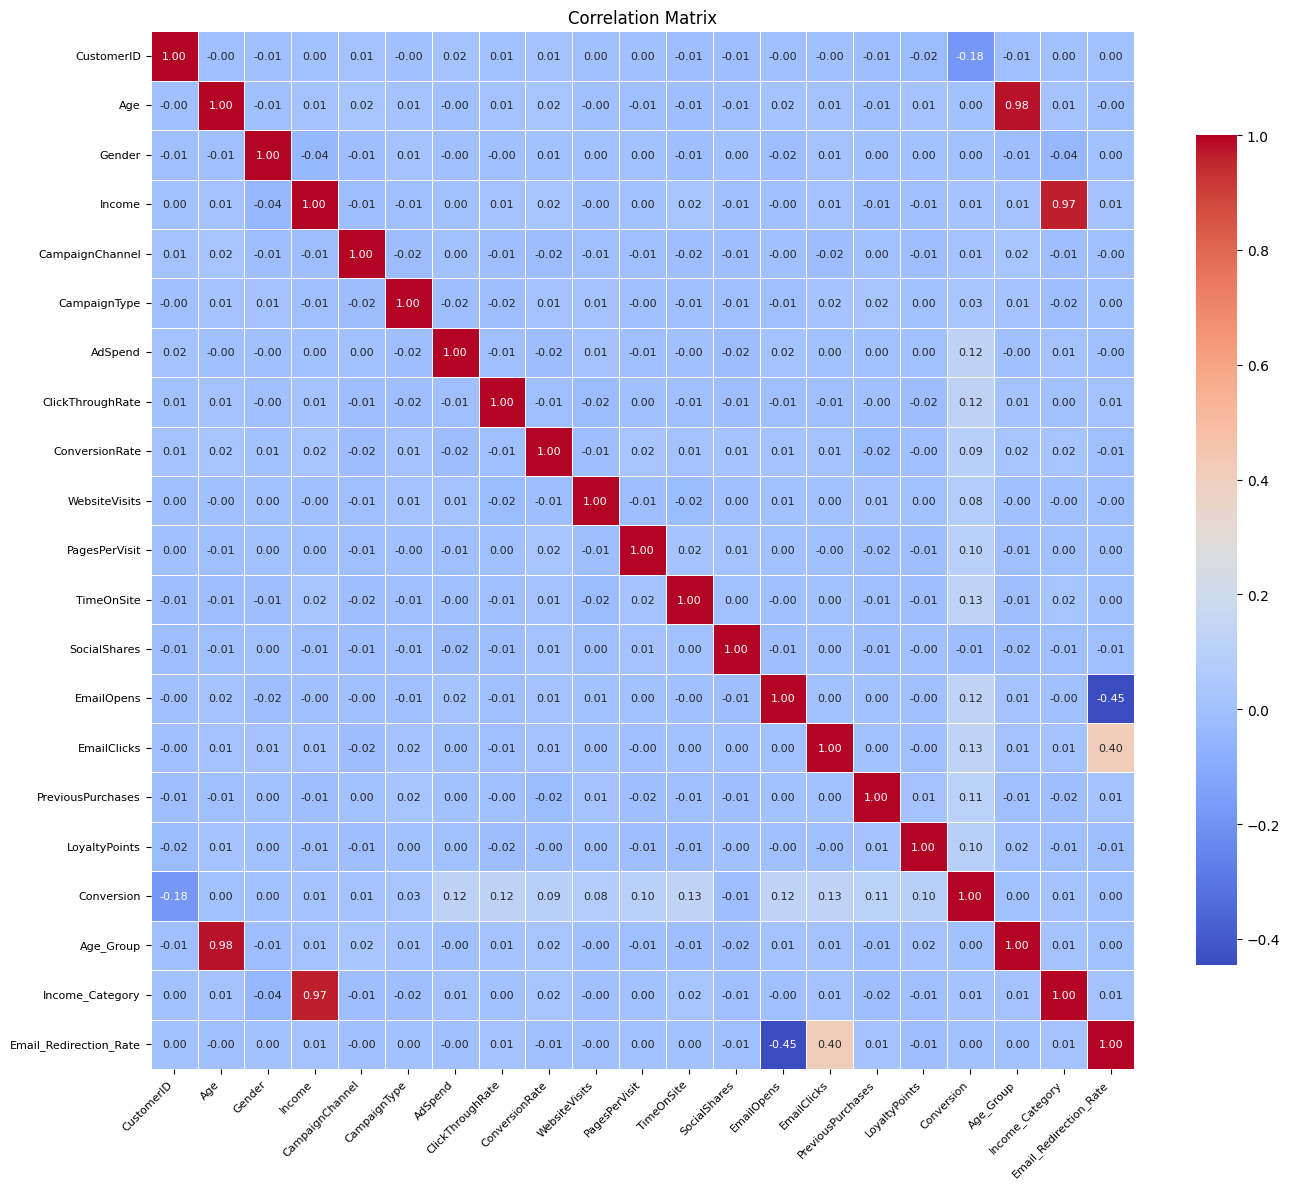

In [328]:
correlation_matrix = df2.corr()

plt.figure(figsize=(14, 12))  # Increase figure size
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    annot_kws={"size": 8},  # Set annotation font size
    cbar_kws={"shrink": 0.8}  # Adjust the color bar size
)
plt.xticks(rotation=45, ha='right', fontsize=8)  # Rotate x-axis labels
plt.yticks(rotation=0, fontsize=8)  # Set y-axis labels size
plt.title('Correlation Matrix')
plt.tight_layout()  # Adjust layout to fit everything nicely
plt.show()

From the correlation matrix, we learnt about different variables:


1.   Campaign channels has an evident correlation with age. This is also intuitive as people from different age groups are used to different advertising platforms.
2.   Campaign type is also correlated with campaign channel, probably because different platforms are more effective in achieving a certain type of campaign purposes.
3. Multiple columns demonstrated high correlation with conversion. Thus, they should be grouped accordingly while synthesizing the data



### 1.3.1 Campaign channels and types

In Digital Marketing, there are 2 aspects we are looking at:


1. Campaign channels: the digital platform on which the campaigns are conducted, which include
*   Social Media - 0
*   Email - 1
*   PPC - Pay per click.  In PPC, you select an advertising platform, create ads, set your target demographic, and launch a campaign for a certain amount of time. (Source: https://nuoptima.com/insights/ppc-for-banks) - 2
*   SEO - search engine optimisation. By optimising a bank's website with relevant keywords, meta tags, and quality content, SEO ensures that the website is easily discoverable by search engines. This, in turn, improves the website's visibility and increases the chances of attracting organic traffic. (Source: https://searchengineland.com/guide/what-is-seo) - 4
*   Referral marketing: Referral marketing is a marketing strategy that uses word of mouth and personal recommendations to grow a business's customer base. (Source: https://www.indeed.com/career-advice/career-development/referral-marketing) - 3


2. Campaign types: what the campaigns aim to achieve, which include



*   Awareness (to inform) - 0
*   Consideration (to persuade) - 3
*   Conversion (to win over) - 2
*   Retention (to keep) - 1





In this segment, we would like to inspect how the two aspects play their roles in affecting the Return of Investment.



In [329]:
df2.columns

Index(['CustomerID', 'Age', 'Gender', 'Income', 'CampaignChannel',
       'CampaignType', 'AdSpend', 'ClickThroughRate', 'ConversionRate',
       'WebsiteVisits', 'PagesPerVisit', 'TimeOnSite', 'SocialShares',
       'EmailOpens', 'EmailClicks', 'PreviousPurchases', 'LoyaltyPoints',
       'Conversion', 'Age_Group', 'Income_Category', 'Email_Redirection_Rate'],
      dtype='object')

In [330]:
df2['Attrition_Flag'] = df2['Conversion']
df2.drop(columns=['Conversion'],inplace=True)

In [331]:
#Inspect the data structure in df2
categorical = ['CampaignChannel','CampaignType']
for col in categorical:
    print(df2[col].unique())

[0 1 2 3 4]
[0 1 2 3]


#### 1.3.1.1 Campaign Channels

In [332]:
grouped = df2.groupby(['Age_Group', 'CampaignChannel']).size().unstack(fill_value=0)
#print("Count:")
#print(grouped)
print("Percentage:")
grouped_percentage = grouped.div(grouped.sum(axis=1), axis=0)
print(grouped_percentage)

Percentage:
CampaignChannel         0         1         2         3         4
Age_Group                                                        
0                0.190236  0.209315  0.201459  0.207632  0.191358
1                0.181018  0.207417  0.213702  0.218730  0.179133
2                0.202059  0.184041  0.201416  0.214929  0.197555
3                0.206349  0.186508  0.215608  0.201720  0.189815
4                0.169144  0.184713  0.200991  0.232838  0.212314


<ipython-input-332-ccd34d92c4db>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df2.groupby(['Age_Group', 'CampaignChannel']).size().unstack(fill_value=0)


In [333]:
#Assigning Campaign Channel to df, with regards to age group
channel_pct = pd.DataFrame({
    0: [0.190236, 0.181018, 0.202059, 0.206349, 0.169144],
    1: [0.209315, 0.207417, 0.184041, 0.186508, 0.184713],
    2: [0.201459, 0.213702, 0.201416, 0.215608, 0.200991],
    3: [0.207632, 0.218730, 0.214929, 0.201720, 0.232838],
    4: [0.191358, 0.179133, 0.197555, 0.189815, 0.212314]
}, index=[0, 1, 2, 3, 4])

#normalising so that sum is 1
channel_pct = channel_pct/channel_pct.sum(axis=1).values.reshape(-1,1)
print(channel_pct)

def assign_campaign_channel(age_group):
    # Get the probabilities for the given Age_Group
    probabilities = channel_pct.loc[age_group].values.tolist()
    return np.random.choice([0,1,2,3,4], p=probabilities)

# Apply the function to the 'Age_Group' column in df to create 'CampaignChannel'
df['CampaignChannel'] = df['Age_Group'].apply(assign_campaign_channel)

          0         1         2         3         4
0  0.190236  0.209315  0.201459  0.207632  0.191358
1  0.181018  0.207417  0.213702  0.218730  0.179133
2  0.202059  0.184041  0.201416  0.214929  0.197555
3  0.206349  0.186508  0.215608  0.201720  0.189815
4  0.169144  0.184713  0.200991  0.232838  0.212314


In [334]:
df['CampaignChannel'].value_counts().sort_index()

,count
CampaignChannel,
1,2246
4,21979
3,45456
2,33654
0,6789


#### 1.3.1.2 Campaign Types

In [335]:
grouped_types = df2.groupby(['CampaignChannel','Attrition_Flag','CampaignType']).size().unstack(fill_value=0)
#print(grouped_types)
print("Percentage:")
types_percentage = grouped_types.div(grouped_types.sum(axis=1), axis=0)
#Inspection
types_percentage

Percentage:


CampaignType                           0         1         2         3
CampaignChannel Attrition_Flag                                        
0               0               0.300000  0.255000  0.140000  0.305000
                1               0.240334  0.241850  0.257013  0.260804
1               0               0.297030  0.277228  0.138614  0.287129
                1               0.234686  0.224354  0.286347  0.254613
2               0               0.298969  0.288660  0.139175  0.273196
                1               0.242300  0.229979  0.287474  0.240246
3               0               0.248756  0.303483  0.154229  0.293532
                1               0.250988  0.247036  0.272727  0.229249
4               0               0.308901  0.272251  0.125654  0.293194
                1               0.243561  0.247976  0.278146  0.230316

In [336]:
campaign_type_pct = pd.DataFrame({
    0: {0: [0.30000, 0.25500, 0.140000, 0.30500],
        1: [0.24033, 0.24185, 0.25701, 0.26081]},
    1: {0: [0.29703, 0.27723, 0.13861, 0.28713],
        1: [0.23469, 0.22435, 0.28635, 0.25461]},
    2: {0: [0.29897, 0.28866, 0.13917, 0.27320],
        1: [0.24230, 0.22998, 0.28747, 0.24025]},
    3: {0: [0.24876, 0.30348, 0.15423, 0.29353],
        1: [0.25100, 0.24703, 0.27273, 0.22924]},
    4: {0: [0.30890, 0.27225, 0.12566, 0.29319],
        1: [0.24356, 0.24797, 0.27815, 0.23032]}
}, index=[0, 1, 2, 3, 4])


def assign_campaign_type(row):
    campaign_channel = row['CampaignChannel']
    conversion = row['Attrition_Flag'] #'Attrition_Flag' column in digital marketing df corresponds to 'Attrition_Flag' column in BankChurners (1, existing, 0, churned)

    # Get the probability distribution for the given CampaignChannel and Conversion from the campaign_type_pct DataFrame
    probabilities = types_percentage.loc[campaign_channel,conversion]
    # Map the CampaignType based on the probabilities for each CampaignChannel and Conversion
    return np.random.choice([0, 1, 2, 3], p=probabilities)

df['CampaignType'] = df.apply(assign_campaign_type, axis=1)
#inspection
print(df[['CampaignChannel','Attrition_Flag','CampaignType']].head(5))

  CampaignChannel  Attrition_Flag  CampaignType
0               3               1             0
1               3               1             0
2               2               1             3
3               4               1             2
4               3               1             2


In [337]:
df['CampaignType'].value_counts().sort_index()

,count
CampaignType,
0,27813
1,27239
2,28373
3,26699


### 1.3.2 Inspecting Adspend data

In [338]:
from scipy.stats import gaussian_kde

In [339]:
##Adspend
print("Adspend data")
adspend_str = df2.groupby(['CampaignChannel', 'CampaignType','Attrition_Flag'])['AdSpend'].agg(['mean', 'max', 'min', 'std']).reset_index()
print(adspend_str.round(2))

Adspend data
    CampaignChannel  CampaignType  Attrition_Flag     mean      max     min  \
0                 0             0               0  4188.68  9765.96  291.63   
1                 0             0               1  5371.94  9979.61  210.26   
2                 0             1               0  4141.34  9640.86  321.51   
3                 0             1               1  5065.18  9970.53  201.53   
4                 0             2               0  3986.85  9159.95  185.57   
5                 0             2               1  4934.85  9958.23  103.96   
6                 0             3               0  3556.04  9447.62  120.36   
7                 0             3               1  5115.20  9984.62  168.43   
8                 1             0               0  4286.64  9773.31  158.58   
9                 1             0               1  4993.35  9988.28  154.09   
10                1             1               0  4399.30  9768.09  169.11   
11                1             1      

AdSpend has a high correlation with Attrition_Flag.

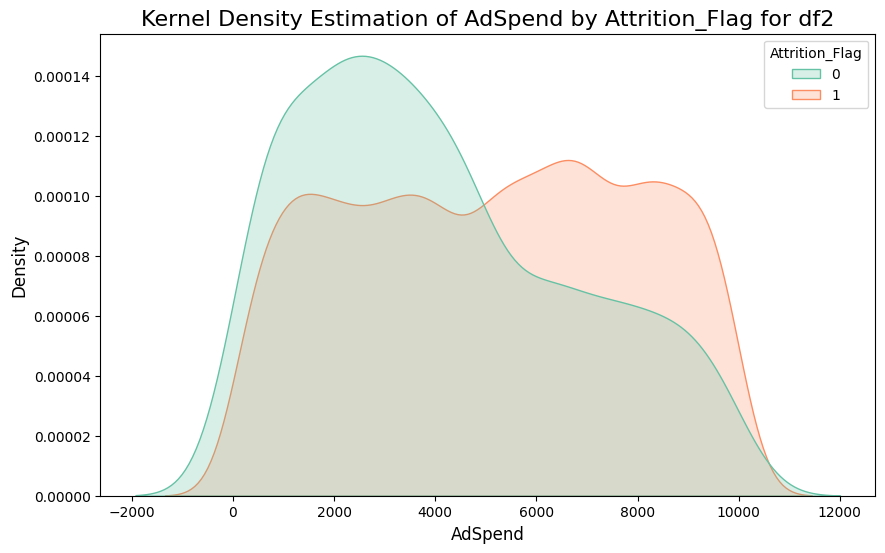

In [340]:
plt.figure(figsize=(10, 6))

# Plot KDE for each value of 'Attrition_Flag'
sns.kdeplot(data=df2, x='AdSpend', hue='Attrition_Flag', fill=True, common_norm=False, palette='Set2')

# Add titles and labels
plt.title('Kernel Density Estimation of AdSpend by Attrition_Flag for df2', fontsize=16)
plt.xlabel('AdSpend', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

### 1.3.3 Inspecting conversion rate data

In [341]:
print("Conversion rate data")
conversion_str = df2.groupby(['CampaignChannel', 'CampaignType', 'Attrition_Flag'])['ConversionRate'].agg(['mean', 'max', 'min', 'std']).reset_index()
print(conversion_str.round(5))

Conversion rate data
    CampaignChannel  CampaignType  Attrition_Flag     mean      max      min  \
0                 0             0               0  0.09241  0.19930  0.01136   
1                 0             0               1  0.10772  0.19926  0.01038   
2                 0             1               0  0.09711  0.19662  0.01427   
3                 0             1               1  0.10234  0.19844  0.01038   
4                 0             2               0  0.10565  0.19399  0.02822   
5                 0             2               1  0.11393  0.19989  0.01100   
6                 0             3               0  0.08820  0.19846  0.01172   
7                 0             3               1  0.10929  0.19856  0.01019   
8                 1             0               0  0.09039  0.19214  0.01102   
9                 1             0               1  0.10680  0.19999  0.01010   
10                1             1               0  0.08503  0.19931  0.01197   
11                1

### 1.3.4 Inspecting Loyalty Points

In [342]:
#Higher correlation between age group and loyalty points
#Possibly due to how the elderly are known to be frugal and paid slightly more attention to accumulating the loyalty points
lp_str = df2.groupby(['Age_Group','Attrition_Flag'])['LoyaltyPoints'].agg(['mean', 'max', 'min', 'std']).reset_index()
lp_str

<ipython-input-342-d63d55aa2fe2>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lp_str = df2.groupby(['Age_Group','Attrition_Flag'])['LoyaltyPoints'].agg(['mean', 'max', 'min', 'std']).reset_index()


,Age_Group,Attrition_Flag,mean,max,min,std
0,0,0,1998.513274,4967,0,1468.609453
1,0,1,2546.376607,4999,1,1409.837650
2,1,0,2283.148718,4997,13,1591.315718
3,1,1,2508.077364,4999,0,1401.208225
4,2,0,2194.718085,4983,7,1482.661958
5,2,1,2501.183016,4994,0,1432.170945
6,3,0,2069.413613,4976,46,1455.124506
7,3,1,2562.672975,4999,17,1421.692190
8,4,0,2118.312139,4884,68,1397.335353
9,4,1,2606.150000,4981,3,1400.371458


### 1.3.5 Inspecting click-through rate

In [343]:
print("Click-through rate:")
clickthrough_str = df2.groupby(['CampaignChannel','CampaignType','Attrition_Flag'])['ClickThroughRate'].agg(['mean', 'max', 'min', 'std']).reset_index()
print(clickthrough_str.round(5))

Click-through rate:
    CampaignChannel  CampaignType  Attrition_Flag     mean      max      min  \
0                 0             0               0  0.11109  0.28146  0.01083   
1                 0             0               1  0.15924  0.29888  0.01102   
2                 0             1               0  0.13904  0.29885  0.01177   
3                 0             1               1  0.16375  0.29928  0.01049   
4                 0             2               0  0.12636  0.26031  0.03145   
5                 0             2               1  0.16408  0.29902  0.01073   
6                 0             3               0  0.12789  0.29897  0.01064   
7                 0             3               1  0.15350  0.29944  0.01113   
8                 1             0               0  0.12281  0.29299  0.01403   
9                 1             0               1  0.15697  0.29943  0.01019   
10                1             1               0  0.12732  0.29248  0.01053   
11                1 

### 1.3.6 Inspecting Social Shares

In [344]:
social_str = df2.groupby(['Age_Group','Attrition_Flag'])['SocialShares'].agg(['mean', 'max', 'min', 'std'])
social_str

<ipython-input-344-84431188b382>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  social_str = df2.groupby(['Age_Group','Attrition_Flag'])['SocialShares'].agg(['mean', 'max', 'min', 'std'])


mean  max  min        std
Age_Group Attrition_Flag                                
0         0               52.039823   99    1  28.573386
          1               51.155527   99    0  28.628953
1         0               48.271795   99    0  29.575397
          1               49.096705   99    0  29.297289
2         0               50.239362   97    0  27.730196
          1               49.979502   99    0  28.617618
3         0               52.361257   99    0  30.354578
          1               48.851628   99    0  28.910480
4         0               51.445087   99    0  29.324639
          1               49.181452   99    0  28.874924

As our target is to determine the ROI for *different* marketing strategies, we need to impose the data structure onto the main BankChurner dataset according to their mean and standard deviation (assuming normal distribution).

## 1.4 Synthetic data

### 1.4.1 Synthetic data for AdSpend

In [345]:
df2['Group'] = df2['Attrition_Flag'].astype(str) + '_' + df2['CampaignChannel'].astype(str)+'_' + df2['CampaignType'].astype(str)

kde_dict = {}
min_max_dict = {}  # To store min and max of AdSpend for each group
for group in df2['Group'].unique():
    # Filter data for the current group
    group_data = df2[df2['Group'] == group]['AdSpend']
    # Fit a KDE for the current group
    kde_dict[group] = gaussian_kde(group_data)
    # Store the min and max AdSpend for clipping
    min_max_dict[group] = (group_data.min(), group_data.max())



# Example check: KDE for a specific group, e.g., '1_0' (Attrition_Flag=1 and CampaignChannel=0)
kde_example = kde_dict['1_0_0']


In [346]:
df['Group'] = df['Attrition_Flag'].astype(str) + '_' + df['CampaignChannel'].astype(str) + '_'+df['CampaignType'].astype(str)
def generate_adspend(row):
    group = row['Group']
    if group in kde_dict:
        # Sample from the corresponding KDE distribution for this group
        generated_value = kde_dict[group].resample(1)[0][0]
        min_value, max_value = min_max_dict[group]
        return np.clip(generated_value, min_value, max_value)
    else:
        return np.nan  # Or some default value if group doesn't exist

# Apply the function to generate synthetic 'AdSpend' values
df['AdSpend'] = df.apply(generate_adspend, axis=1)

# Inspect the new DataFrame
print(df.head())

   CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               1            45       1                3   
1  818770008               1            49       0                5   
2  713982108               1            51       1                3   
3  709106358               1            40       1                3   
4  713061558               1            44       1                2   

  Education_Level  Marital_Status  Income_Category  Card_Category  \
0     High School               1                2              1   
1        Graduate               0                4              1   
2        Graduate               1                3              1   
3      Uneducated               1                2              1   
4        Graduate               1                1              1   

   Month_with_bank  ...  Total_Revolving_Bal  Avg_Open_To_Buy  \
0               39  ...                  777          11914.0   
1               44  ...     

In [347]:
df.groupby(['CampaignChannel','CampaignType','Attrition_Flag'])['AdSpend'].agg(['max','min','mean','std'])

<ipython-input-347-6011c941292e>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['CampaignChannel','CampaignType','Attrition_Flag'])['AdSpend'].agg(['max','min','mean','std'])


max         min  \
CampaignChannel CampaignType Attrition_Flag                            
1               0            0               9773.308442  158.583632   
                             1               9988.281818  154.086910   
                1            0               9768.092816  169.105212   
                             1               9961.130509  173.380052   
                2            0               9562.704254  525.337589   
                             1               9997.914781  119.423981   
                3            0               9557.150841  170.562278   
                             1               9987.926017  132.382161   
4               0            0               9618.216161  298.301627   
                             1               9974.521158  121.385031   
                1            0               9952.527856  146.090258   
                             1               9971.656452  110.168672   
                2            0               9935.375535  167.283219   
                             1               9996.986533  135.307684   
                3            0               9977.669768  196.900098   
                             1               9989.800448  195.842744   
3               0            0               9216.165465  273.213386   
                             1               9997.002376  176.767354   
                1            0               9933.205405  126.053276   
                             1               9930.941958  193.885215   
                2            0               9778.528073  130.670562   
                             1               9992.481744  114.503431   
                3            0               9870.029447  100.965939   
                             1               9983.976999  112.376262   
2               0            0               9864.945986  100.668227   
                             1               9965.885208  187.209173   
                1            0               8839.262702  160.349459   
                             1               9981.703692  237.512336   
                2            0               9431.039528  256.776509   
                             1               9997.347635  126.344926   
                3            0               9966.416994  100.054813   
                             1               9986.858288  103.409243   
0               0            0               9765.955086  291.632201   
                             1               9979.610121  210.262007   
                1            0               9640.858663  321.510973   
                             1               9970.528730  201.525979   
                2            0               9159.947948  185.573833   
                             1               9958.230832  103.956957   
                3            0               9447.615786  120.364505   
                             1               9984.617643  168.434653   

                                                    mean          std  
CampaignChannel CampaignType Attrition_Flag                            
1               0            0               4316.394185  2705.826882  
                             1               4714.396344  2749.739763  
                1            0               4016.313453  2943.050248  
                             1               5301.685300  2758.143397  
                2            0               4809.012975  2392.195490  
                             1               5242.101022  2953.071357  
                3            0               3709.293823  2444.928429  
                             1               5330.503840  2733.730846  
4               0            0               4231.762437  2509.697516  
                             1               5268.046686  2936.664748  
                1            0               3945.394511  2848.746096  
                             1               5188.180343  2852.028023  
                2   

### 1.4.2 Synthetic data for conversion rate

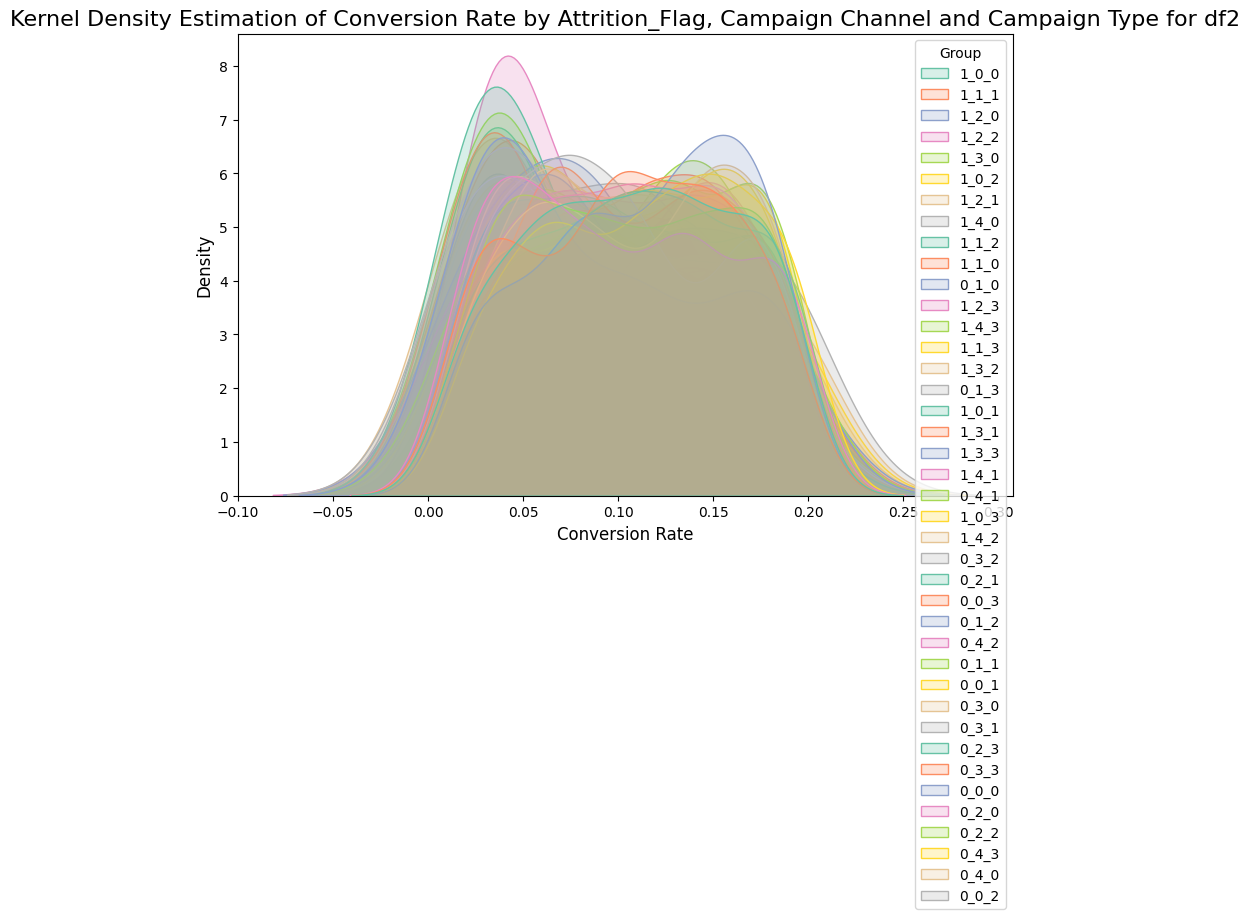

In [348]:
plt.figure(figsize=(10, 6))

# Plot KDE for each value of 'Attrition_Flag'
sns.kdeplot(data=df2, x='ConversionRate', hue='Group', fill=True, common_norm=False, palette='Set2')

# Add titles and labels
plt.title('Kernel Density Estimation of Conversion Rate by Attrition_Flag, Campaign Channel and Campaign Type for df2', fontsize=16)
plt.xlabel('Conversion Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

In [349]:
kde_dict = {}
min_max_dict = {}  # To store min and max of ConversionRate for each group
for group in df2['Group'].unique():
    # Filter data for the current group
    group_data = df2[df2['Group'] == group]['ConversionRate']
    # Fit a KDE for the current group
    kde_dict[group] = gaussian_kde(group_data)
    # Store the min and max AdSpend for clipping
    min_max_dict[group] = (group_data.min(), group_data.max())



# Example check: KDE for a specific group, e.g., '1_0' (Attrition_Flag=1 and CampaignChannel=0)
kde_example = kde_dict['1_0_0']


In [350]:
def generate_cr(row):
    group = row['Group']
    if group in kde_dict:
        # Sample from the corresponding KDE distribution for this group
        generated_value = kde_dict[group].resample(1)[0][0]
        min_value, max_value = min_max_dict[group]
        return np.clip(generated_value, min_value, max_value)
    else:
        return np.nan  # Or some default value if group doesn't exist

# Apply the function to generate synthetic 'AdSpend' values
df['ConversionRate'] = df.apply(generate_cr, axis=1)

# Inspect the new DataFrame
print(df.head())

   CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               1            45       1                3   
1  818770008               1            49       0                5   
2  713982108               1            51       1                3   
3  709106358               1            40       1                3   
4  713061558               1            44       1                2   

  Education_Level  Marital_Status  Income_Category  Card_Category  \
0     High School               1                2              1   
1        Graduate               0                4              1   
2        Graduate               1                3              1   
3      Uneducated               1                2              1   
4        Graduate               1                1              1   

   Month_with_bank  ...  Avg_Open_To_Buy  Total_Trans_Amt  Total_Trans_Count  \
0               39  ...          11914.0             1144                 42  

In [351]:
df.groupby(['CampaignChannel','CampaignType','Attrition_Flag'])['ConversionRate'].agg(['max','min','mean','std'])

<ipython-input-351-602e4cc17e03>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['CampaignChannel','CampaignType','Attrition_Flag'])['ConversionRate'].agg(['max','min','mean','std'])


max       min      mean  \
CampaignChannel CampaignType Attrition_Flag                                 
1               0            0               0.192139  0.011022  0.093024   
                             1               0.199992  0.010100  0.109690   
                1            0               0.199308  0.011975  0.080738   
                             1               0.197803  0.010667  0.103133   
                2            0               0.190984  0.012027  0.087161   
                             1               0.198782  0.010274  0.111621   
                3            0               0.199710  0.010725  0.092027   
                             1               0.199583  0.010625  0.109233   
4               0            0               0.196405  0.010849  0.086284   
                             1               0.199252  0.010459  0.099708   
                1            0               0.199675  0.011808  0.096367   
                             1               0.198303  0.010934  0.106058   
                2            0               0.179221  0.012100  0.095698   
                             1               0.199995  0.010134  0.101310   
                3            0               0.199059  0.010018  0.095447   
                             1               0.199686  0.010163  0.113027   
3               0            0               0.199591  0.010914  0.106594   
                             1               0.198719  0.010118  0.105540   
                1            0               0.191982  0.010020  0.087872   
                             1               0.199672  0.010106  0.106555   
                2            0               0.193310  0.011419  0.083832   
                             1               0.199938  0.010186  0.103947   
                3            0               0.197844  0.010354  0.092181   
                             1               0.199437  0.010100  0.101175   
2               0            0               0.191858  0.011253  0.079953   
                             1               0.199727  0.010799  0.113976   
                1            0               0.198188  0.010791  0.077901   
                             1               0.199358  0.010271  0.107858   
                2            0               0.187511  0.027495  0.106221   
                             1               0.199607  0.010094  0.100589   
                3            0               0.198369  0.011790  0.086505   
                             1               0.199352  0.010059  0.105768   
0               0            0               0.199302  0.011359  0.092883   
                             1               0.199265  0.010383  0.107201   
                1            0               0.196620  0.014266  0.099063   
                             1               0.198436  0.010385  0.101128   
                2            0               0.193991  0.028223  0.105048   
                             1               0.199886  0.011005  0.115781   
                3            0               0.198462  0.011720  0.086663   
                             1               0.198555  0.010192  0.109154   

                                                  std  
CampaignChannel CampaignType Attrition_Flag            
1               0            0               0.061641  
                             1               0.056123  
                1            0               0.056855  
                             1               0.054366  
                2            0               0.055459  
                             1               0.056976  
                3            0               0.053175  
                             1               0.053979  
4               0            0               0.062382  
                             1               0.055610  
                1            0               0.058362  
                             1               0.053790  
                2            0 

### 1.4.3 Sythetic data for Loyalty Points

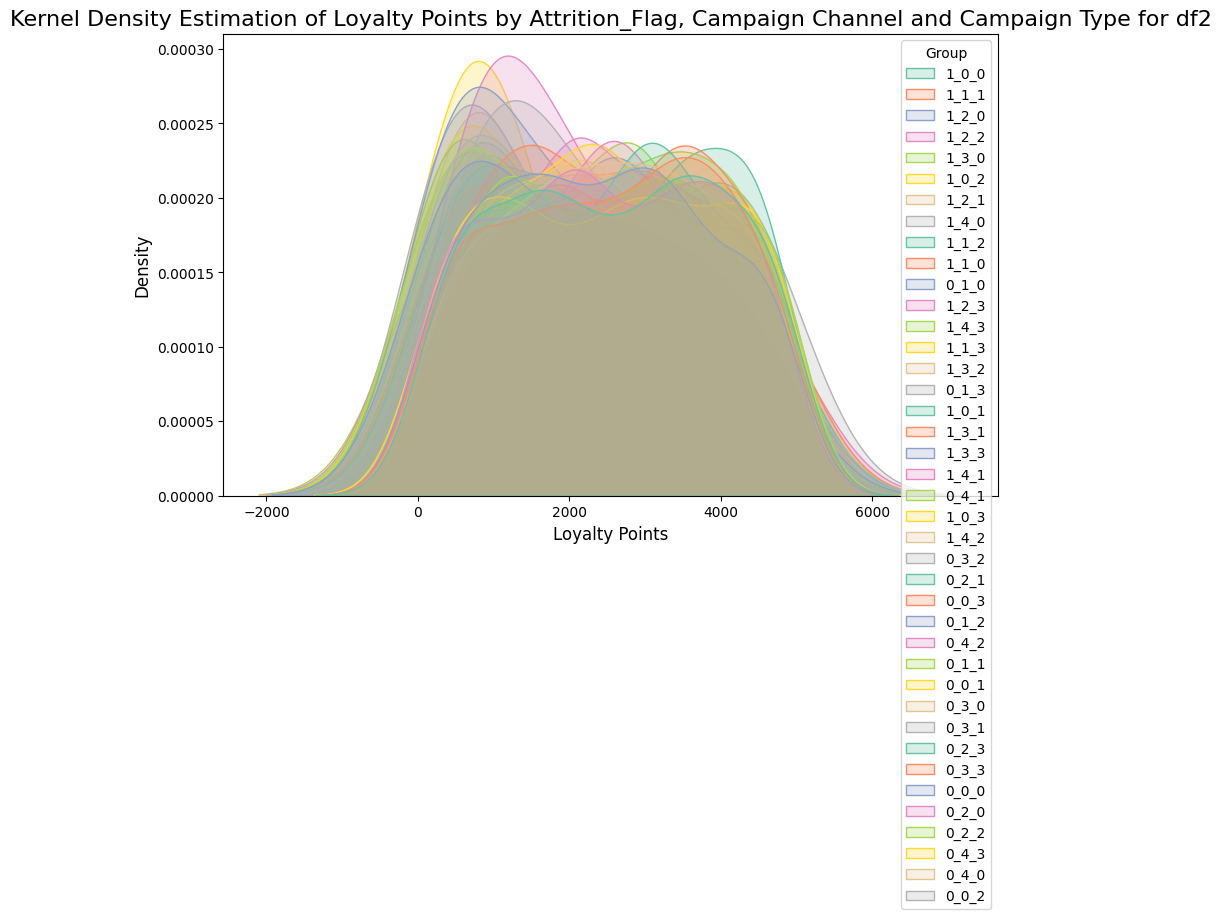

In [352]:
plt.figure(figsize=(10, 6))

# Plot KDE for each value of 'Attrition_Flag'
sns.kdeplot(data=df2, x='LoyaltyPoints', hue='Group', fill=True, common_norm=False, palette='Set2')

# Add titles and labels
plt.title('Kernel Density Estimation of Loyalty Points by Attrition_Flag, Campaign Channel and Campaign Type for df2', fontsize=16)
plt.xlabel('Loyalty Points', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show the plot
plt.show()

In [353]:
kde_dict = {}
min_max_dict = {}  # To store min and max of LoyaltyPoints for each group
for group in df2['Group'].unique():
    # Filter data for the current group
    group_data = df2[df2['Group'] == group]['LoyaltyPoints']
    # Fit a KDE for the current group
    kde_dict[group] = gaussian_kde(group_data)
    # Store the min and max Loyalty Points for clipping
    min_max_dict[group] = (group_data.min(), group_data.max())



# Example check: KDE for a specific group, e.g., '1_0' (Attrition_Flag=1 and CampaignChannel=0)
kde_example = kde_dict['1_0_0']

In [354]:
def generate_lp(row):
    group = row['Group']
    if group in kde_dict:
        # Sample from the corresponding KDE distribution for this group
        generated_value = kde_dict[group].resample(1)[0][0]
        min_value, max_value = min_max_dict[group]
        return np.clip(generated_value, min_value, max_value)
    else:
        return np.nan  # Or some default value if group doesn't exist

# Apply the function to generate synthetic 'AdSpend' values
df['LoyaltyPoints'] = df.apply(generate_lp, axis=1)

# Inspect the new DataFrame
print(df.head())

   CLIENTNUM  Attrition_Flag  Customer_Age  Gender  Dependent_count  \
0  768805383               1            45       1                3   
1  818770008               1            49       0                5   
2  713982108               1            51       1                3   
3  709106358               1            40       1                3   
4  713061558               1            44       1                2   

  Education_Level  Marital_Status  Income_Category  Card_Category  \
0     High School               1                2              1   
1        Graduate               0                4              1   
2        Graduate               1                3              1   
3      Uneducated               1                2              1   
4        Graduate               1                1              1   

   Month_with_bank  ...  Total_Trans_Amt  Total_Trans_Count  \
0               39  ...             1144                 42   
1               44  ...         

In [355]:
df.groupby(['CampaignChannel','CampaignType','Attrition_Flag'])['LoyaltyPoints'].agg(['max','min','mean','std'])

<ipython-input-355-d174a9d3e580>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['CampaignChannel','CampaignType','Attrition_Flag'])['LoyaltyPoints'].agg(['max','min','mean','std'])


max    min         mean  \
CampaignChannel CampaignType Attrition_Flag                               
1               0            0               4906.0   35.0  2075.080241   
                             1               4981.0    0.0  2624.611154   
                1            0               4757.0   40.0  1959.230848   
                             1               4987.0   20.0  2532.443647   
                2            0               4353.0  247.0  1857.623698   
                             1               4994.0   28.0  2491.671757   
                3            0               4954.0   58.0  2059.133172   
                             1               4990.0   21.0  2501.601003   
4               0            0               4739.0   62.0  2084.434734   
                             1               4994.0   11.0  2545.436136   
                1            0               4936.0    9.0  2107.610867   
                             1               4977.0   15.0  2550.656521   
                2            0               4618.0   51.0  1981.814112   
                             1               4999.0    4.0  2455.200449   
                3            0               4781.0   31.0  1870.048712   
                             1               4981.0    0.0  2617.148475   
3               0            0               4870.0    0.0  2398.675000   
                             1               4998.0    8.0  2570.976751   
                1            0               4976.0   25.0  2016.045601   
                             1               4999.0    1.0  2408.127636   
                2            0               4983.0  262.0  2139.835445   
                             1               4986.0    9.0  2523.654176   
                3            0               4822.0   90.0  2342.794577   
                             1               4999.0   19.0  2501.858042   
2               0            0               4935.0   73.0  2082.473084   
                             1               4981.0    3.0  2423.916645   
                1            0               4947.0   13.0  2229.522965   
                             1               4957.0   11.0  2505.926600   
                2            0               4687.0   46.0  1902.801949   
                             1               4981.0    5.0  2497.891768   
                3            0               4882.0   21.0  2231.890338   
                             1               4994.0    4.0  2514.504558   
0               0            0               4997.0   86.0  2236.752565   
                             1               4976.0    0.0  2546.380370   
                1            0               4939.0    7.0  1910.056626   
                             1               4956.0   11.0  2697.271825   
                2            0               4909.0  623.0  2635.255555   
                             1               4987.0   11.0  2522.553091   
                3            0               4884.0  146.0  2413.598540   
                             1               4987.0   37.0  2596.314950   

                                                     std  
CampaignChannel CampaignType Attrition_Flag               
1               0            0               1542.939577  
                             1               1438.552486  
                1            0               1505.800401  
                             1               1489.071171  
                2            0               1304.089626  
                             1               1455.930314  
                3            0               1513.286522  
                             1               1452.530663  
4               0            0               1510.419050  
                             1               1490.886025  
                1            0               1510.581079  
                             1               1411.792783  
                2            0               1339.298202  
            

### 1.4.3 Sythetic data for Click-through Rate

In [356]:
df = df.merge(clickthrough_str[['CampaignChannel','CampaignType', 'Attrition_Flag','mean', 'std', 'min', 'max']],
              on=['CampaignChannel','CampaignType','Attrition_Flag'],
              how='left')

# Generate synthetic data using normal distribution
df['ClickThroughRate'] = np.random.normal(df['mean'], df['std'])
df['ClickThroughRate'] = np.clip(df['ClickThroughRate'], df['min'], df['max'])
df.drop(['mean', 'std', 'min', 'max'], axis=1, inplace=True)

# Display the result
print(df[['CampaignChannel', 'CampaignType', 'ClickThroughRate']].head())

   CampaignChannel  CampaignType  ClickThroughRate
0                3             0          0.226050
1                3             0          0.062238
2                2             3          0.110000
3                4             2          0.173116
4                3             2          0.173831


## 1.5 Calculating ROI

1.Core formula:

$ Marketing ROI  = \dfrac{Sales Growth - Marketing Cost}{Marketing Cost} $


It’s important to note, however, that this formula makes the assumption that
all sales growth is tied to marketing efforts.


2.Realistic view:
$ Marketing ROI = \dfrac{Sales Growth - Organic Sales Growth - Marketing Cost}{Marketing Cost} $


*Source: https://www.marketingevolution.com/marketing-essentials/marketing-roi*

### 1.5.1 Customer Value Calculation

There are 3 major areas to look out for:


*   Customer Purchase (Avg_Open_To_Buy)
*   Customer Loyalty (LoyaltyPoints)
*   Time Spent with our bank (Month_with_bank)





In [357]:
#Assigning weights to the three areas
w_purchase = 0.5
w_loyalty = 0.3
w_months = 0.2

In [358]:
#Normalising loyalty and months based on purchase
#Getting the min and max for Purchase
purchase_min = df['Avg_Open_To_Buy'].min()
purchase_max = df['Avg_Open_To_Buy'].max()

df['LoyaltyPoints_Scaled'] = (df['LoyaltyPoints'] - df['LoyaltyPoints'].min()) / (df['LoyaltyPoints'].max() - df['LoyaltyPoints'].min()) * (purchase_max - purchase_min) + purchase_min
df['Month_with_bank_Scaled'] = (df['Month_with_bank'] - df['Month_with_bank'].min()) / (df['Month_with_bank'].max() - df['Month_with_bank'].min()) * (purchase_max - purchase_min) + purchase_min

df[['LoyaltyPoints','LoyaltyPoints_Scaled','Month_with_bank','Month_with_bank_Scaled']].head(4)

,LoyaltyPoints,LoyaltyPoints_Scaled,Month_with_bank,Month_with_bank_Scaled
0,716.182752,4947.511963,39,20871.325581
1,438.278775,3028.868247,44,24884.465116
2,4.000000,30.615923,36,18463.441860
3,329.518883,2277.992042,21,6424.023256


In [359]:
df['Customer_Value'] = w_purchase * df['Avg_Open_To_Buy'] + w_loyalty * df['LoyaltyPoints_Scaled'] + w_months * df['Month_with_bank_Scaled']
df['Customer_Value'].agg(['max', 'min', 'mean', 'std'])

,Customer_Value
max,34318.192922
min,292.197179
mean,13046.876189
std,6097.975558


###1.5.2 Campaign value

Campaign value calculates the value created by our campaign efforts. The campaign value is measured in terms of

*   Original Customer value
*   Campaign success gauge (Conversion rate)

Conversion rate denotes the likelihood for a customer to take desired actions after campaign

In [360]:
df['ConversionRate'].agg(['mean','std','max','min'])

,ConversionRate
mean,0.103083
std,0.056218
max,0.199995
min,0.010018


In [361]:
df['CampaignValue'] = df['Customer_Value'] * df['ConversionRate'] * 30 #Amplifier
df['CampaignValue'].agg(['mean','std','max','min'])

,CampaignValue
mean,40340.795283
std,30773.774588
max,194891.092962
min,196.498560


In [362]:
#Customer Value according to income and card category
average_result = df.groupby(['Income_Category', 'Card_Category'])['CampaignValue'].mean().reset_index()

print(average_result)

    Income_Category  Card_Category  CampaignValue
0                 0              1   51906.771859
1                 0              2   58303.103787
2                 0              3   71391.691380
3                 1              1   34966.575505
4                 1              2   50346.065056
5                 1              3   52221.801784
6                 2              1   43695.978932
7                 2              2   63151.097132
8                 2              3   72857.467351
9                 3              1   48875.955060
10                3              2   70185.295634
11                3              3   71921.478661
12                4              1   31428.968297
13                4              2   37367.202538
14                4              3   39681.887783


### 1.5.3 Trend Analysis

Let us further inspect the relationship with income and card category

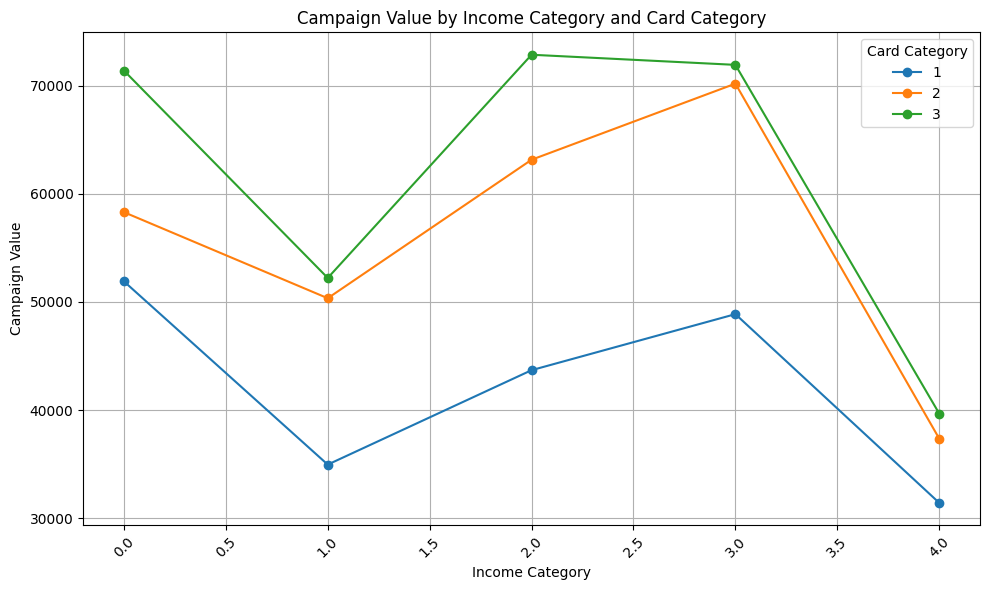

In [363]:
# Grouping to handle duplicates by taking the mean
grouped_df = average_result.groupby(['Income_Category', 'Card_Category'], as_index=False)['CampaignValue'].mean()

# Pivot the DataFrame
pivot_df = grouped_df.pivot(index='Income_Category', columns='Card_Category', values='CampaignValue')

plt.figure(figsize=(10, 6))

for card in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[card], marker='o', label=card)

plt.title('Campaign Value by Income Category and Card Category')
plt.xlabel('Income Category')
plt.ylabel('Campaign Value')
plt.xticks(rotation=45)
plt.legend(title='Card Category')
plt.grid()
plt.tight_layout()
plt.show()

In contrast, education does not seem to have a very large impact on customer value, and there is a slight decreasing trend

In [364]:
average_result2 = df.groupby(['Education_Level', 'Card_Category'])['CampaignValue'].mean().reset_index()

print(average_result2)

   Education_Level  Card_Category  CampaignValue
0       Uneducated              1   41201.198848
1       Uneducated              2   56336.712445
2       Uneducated              3   67082.024157
3      High School              1   38023.556667
4      High School              2   53840.865492
5      High School              3   62437.417962
6          College              1   36952.110556
7          College              2   58083.707642
8          College              3   70438.726265
9         Graduate              1   37063.464282
10        Graduate              2   49101.440330
11        Graduate              3   61941.961000
12   Post-Graduate              1   36504.629850
13   Post-Graduate              2   58424.107849
14   Post-Graduate              3   68187.446756
15       Doctorate              1   35399.615096
16       Doctorate              2   48865.513844
17       Doctorate              3   52924.730888
18         Unknown              1            NaN
19         Unknown  

<ipython-input-364-0b09b3d72442>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_result2 = df.groupby(['Education_Level', 'Card_Category'])['CampaignValue'].mean().reset_index()


<ipython-input-365-e51c6078eae3>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_df2 = average_result2.groupby(['Education_Level', 'Card_Category'], as_index=False)['CampaignValue'].mean()


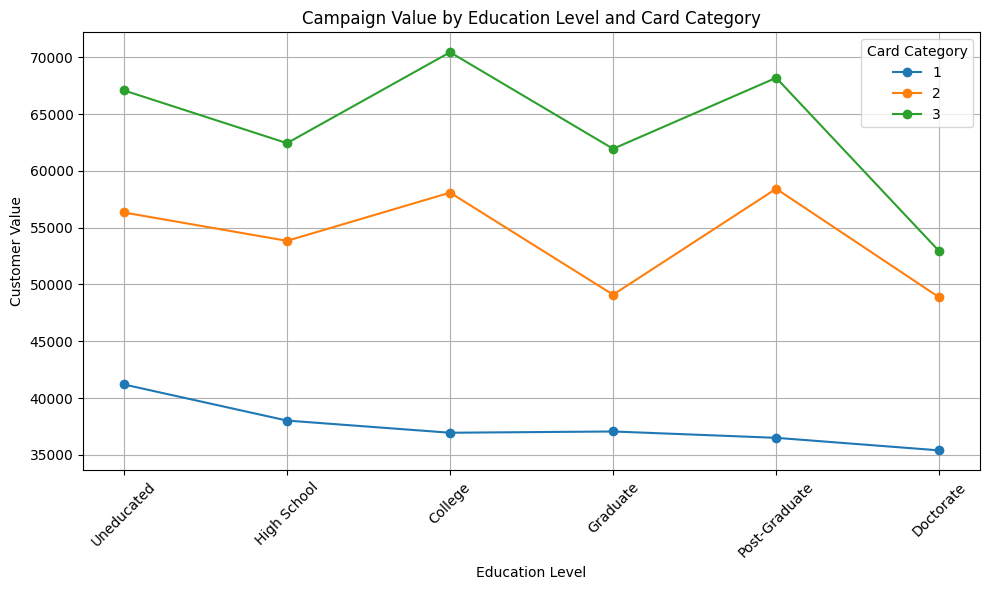

In [365]:
# Grouping to handle duplicates by taking the mean
grouped_df2 = average_result2.groupby(['Education_Level', 'Card_Category'], as_index=False)['CampaignValue'].mean()

# Pivot the DataFrame
pivot_df = grouped_df2.pivot(index='Education_Level', columns='Card_Category', values='CampaignValue')

plt.figure(figsize=(10, 6))

for card in pivot_df.columns:
    plt.plot(pivot_df.index, pivot_df[card], marker='o', label=card)

plt.title('Campaign Value by Education Level and Card Category')
plt.xlabel('Education Level')
plt.ylabel('Customer Value')
plt.xticks(rotation=45)
plt.legend(title='Card Category')
plt.grid()
plt.tight_layout()
plt.show()

From this graph, we can see that campaign value is positively correlated with both income and card category.

Thus, in our evaluation, we have recognised with reasoning that for customers with different income and card categories are different, campaign values are slightly decreasing for increasing education level.

### 1.5.4 ROI

#### 1.5.4.1 Macro-ROI

ROI summary for all methods

In [366]:
grouped_sums = df.groupby(['CampaignType', 'CampaignChannel'])[['CampaignValue', 'AdSpend']].sum().reset_index()
print(grouped_sums)

    CampaignType  CampaignChannel  CampaignValue       AdSpend
0              0                0   7.099322e+07  8.552675e+06
1              0                1   2.098809e+07  2.527281e+06
2              0                2   3.546672e+08  4.188198e+07
3              0                3   4.822853e+08  5.840731e+07
4              0                4   2.088947e+08  2.861409e+07
5              1                0   6.835362e+07  7.958785e+06
6              1                1   1.899124e+07  2.717667e+06
7              1                2   3.231630e+08  3.929022e+07
8              1                3   4.626216e+08  5.763151e+07
9              1                4   2.188713e+08  2.743096e+07
10             2                0   7.100000e+07  7.474848e+06
11             2                1   2.325963e+07  3.161122e+06
12             2                2   3.463162e+08  4.279773e+07
13             2                3   4.802235e+08  5.862015e+07
14             2                4   2.163107e+08  2.718

In [367]:
grouped_sums['ROI'] = (grouped_sums['CampaignValue'] - grouped_sums['AdSpend']) / grouped_sums['AdSpend']
macro_roi = grouped_sums.drop(columns = ['CampaignValue','AdSpend'])
macro_roi = macro_roi.sort_values(by='ROI', ascending=False).reset_index(drop=True).round(5)
print(macro_roi)


    CampaignType  CampaignChannel      ROI
0              2                0  8.49852
1              3                0  7.97402
2              3                4  7.63321
3              1                0  7.58845
4              0                2  7.46825
5              0                1  7.30461
6              0                0  7.30070
7              0                3  7.25728
8              1                2  7.22503
9              2                3  7.19212
10             2                2  7.09193
11             1                3  7.02723
12             3                2  6.98083
13             1                4  6.97899
14             3                3  6.97036
15             2                4  6.95791
16             2                1  6.35803
17             0                4  6.30041
18             3                1  6.24887
19             1                1  5.98807


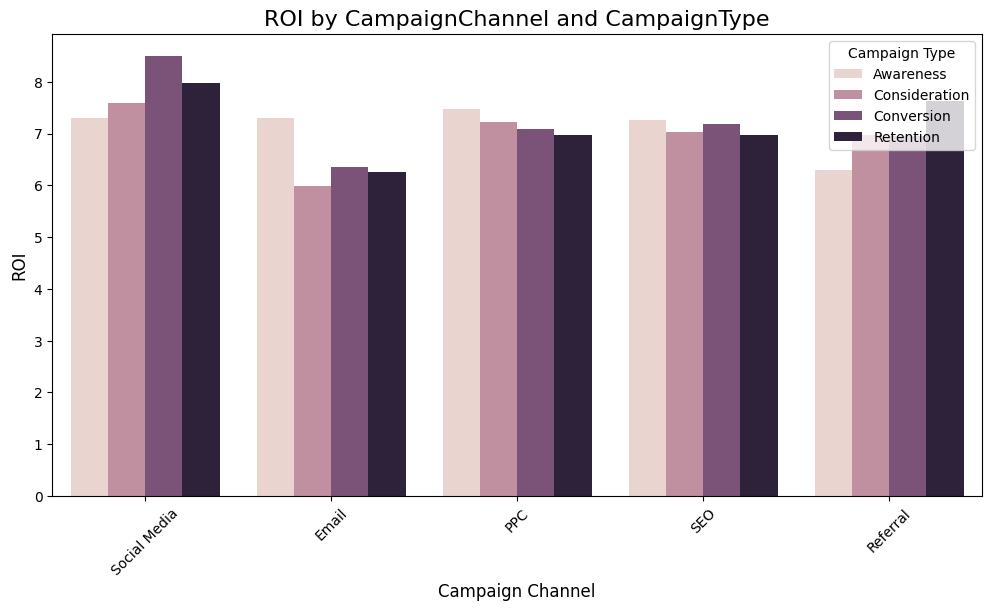

In [368]:
plt.figure(figsize=(12, 6))

# Create a bar plot
sns.barplot(data=macro_roi, x='CampaignChannel', y='ROI', hue='CampaignType')

# Add titles and labels
plt.title('ROI by CampaignChannel and CampaignType', fontsize=16)
plt.xlabel('Campaign Channel', fontsize=12)
plt.ylabel('ROI', fontsize=12)

new_labels = ['Social Media', 'Email', 'PPC', 'SEO', 'Referral']  # Customize with actual labels you want
plt.xticks(ticks=range(len(macro_roi['CampaignChannel'].unique())), labels=new_labels, rotation=45)

handles, labels = plt.gca().get_legend_handles_labels()

# Create a dictionary of old labels and new labels
label_dict = {
    '0': 'Awareness',
    '1': 'Consideration',
    '2': 'Conversion',
    '3':'Retention'
}

# Replace old labels with new labels
new_labels = [label_dict.get(label, label) for label in labels]

# Apply the updated legend
plt.legend(handles=handles, labels=new_labels, title='Campaign Type')

# Show the plot
plt.show()

#### 1.5.4.2 Micro-ROI

ROI for each customer campaign

In [369]:
#Find ROI
df['ROI'] = (df['CampaignValue'] - df['AdSpend'])/df['AdSpend']
print(df['ROI'].head(20))

0      3.017014
1     14.180793
2      0.624765
3      2.736943
4     10.277176
5      2.698220
6      3.331591
7     27.397696
8     13.407180
9      2.552394
10    37.111304
11     7.058005
12     0.123668
13     7.993322
14     0.498610
15    -0.058037
16     2.362337
17     4.601090
18     2.331689
19    14.182851
Name: ROI, dtype: float64


### 1.5.5 Inspecting the combined dataset df

#### 1.5.5.1 Encoding categorical variable - education level

In [370]:
df['Education_Level'].unique()

['High School', 'Graduate', 'Uneducated', 'College', 'Post-Graduate', 'Doctorate']
Categories (7, object): ['Uneducated' < 'High School' < 'College' < 'Graduate' < 'Post-Graduate' <
                         'Doctorate' < 'Unknown']

In [371]:
df['Education_Level_Numeric'] = df['Education_Level'].cat.codes
df[['Education_Level','Education_Level_Numeric']]

,Education_Level,Education_Level_Numeric
0,High School,1
1,Graduate,3
2,Graduate,3
3,Uneducated,0
4,Graduate,3
...,...,...
110119,High School,1
110120,Doctorate,5
110121,Doctorate,5
110122,College,2


In [372]:
df.drop(columns=['Education_Level'], inplace=True)

In [373]:
correlation_matrix = df.corr()
roi_correlation = correlation_matrix['ROI'].sort_values(ascending=False)
print(roi_correlation)


ROI                        1.000000
CampaignValue              0.249022
ConversionRate             0.177920
Customer_Value             0.152572
Avg_Open_To_Buy            0.128435
Credit_Limit               0.095285
LoyaltyPoints              0.074907
LoyaltyPoints_Scaled       0.074907
Gender                     0.062402
Card_Category              0.053084
Month_with_bank_Scaled     0.036668
Month_with_bank            0.036668
CampaignType               0.035310
Customer_Age               0.012239
Age_Group                  0.011355
Total_Revolving_Bal        0.009379
Months_Inactive_12_mon     0.001344
Dependent_count           -0.000510
ClickThroughRate          -0.003959
CLIENTNUM                 -0.004152
CampaignChannel           -0.007220
No_of_product             -0.008680
Marital_Status            -0.011976
Education_Level_Numeric   -0.014522
Total_Trans_Count         -0.017512
Total_Trans_Amt           -0.019245
Group                     -0.032711
Attrition_Flag            -0

In [374]:
adspend_correlation = correlation_matrix['AdSpend'].sort_values(ascending=False)
print(adspend_correlation)

AdSpend                    1.000000
Attrition_Flag             0.128576
Group                      0.125122
Total_Trans_Count          0.040826
Total_Trans_Amt            0.024182
ClickThroughRate           0.019554
CampaignChannel            0.015291
ConversionRate             0.013939
LoyaltyPoints_Scaled       0.012564
LoyaltyPoints              0.012564
CampaignValue              0.011138
Dependent_count            0.006648
Credit_Limit               0.005368
Customer_Value             0.005115
No_of_product              0.004709
Avg_Utilization_Ratio      0.004030
Income_Category            0.003885
Gender                     0.003282
Avg_Open_To_Buy            0.001138
CLIENTNUM                 -0.001147
Card_Category             -0.003434
Education_Level_Numeric   -0.004447
Total_Revolving_Bal       -0.005293
Month_with_bank_Scaled    -0.008842
Month_with_bank           -0.008842
Months_Inactive_12_mon    -0.009857
CampaignType              -0.012448
Age_Group                 -0

In [375]:
df.drop(columns=['Group'], inplace=True) #All information in Group is captured in one hot encoding

In [376]:
df.drop(columns=['CampaignValue'], inplace=True) #variable that is used directly to fin ROI

In [377]:
df.drop(columns=['CLIENTNUM'], inplace=True)

# 2 Model

###Feature Selection with Random Forest Model

In [378]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [379]:
X = df.drop('ROI', axis=1)
y = df['ROI']

In [380]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [381]:
# Train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [382]:
# Predictions and evaluation
y_pred_rf = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 20.855752966503683


In [383]:
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R Square: {r2_rf}")

R Square: 0.9966223423990088


In [384]:
importance = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                    Feature  Importance
19                  AdSpend    0.607654
20           ConversionRate    0.202563
25           Customer_Value    0.183619
12          Avg_Open_To_Buy    0.000998
22         ClickThroughRate    0.000454
14        Total_Trans_Count    0.000422
13          Total_Trans_Amt    0.000407
15    Avg_Utilization_Ratio    0.000356
11      Total_Revolving_Bal    0.000354
10             Credit_Limit    0.000349
23     LoyaltyPoints_Scaled    0.000341
21            LoyaltyPoints    0.000335
1              Customer_Age    0.000331
24   Month_with_bank_Scaled    0.000236
7           Month_with_bank    0.000235
8             No_of_product    0.000215
3           Dependent_count    0.000179
5           Income_Category    0.000172
26  Education_Level_Numeric    0.000153
18             CampaignType    0.000123
9    Months_Inactive_12_mon    0.000120
17          CampaignChannel    0.000096
16                Age_Group    0.000075
6             Card_Category    0.000072


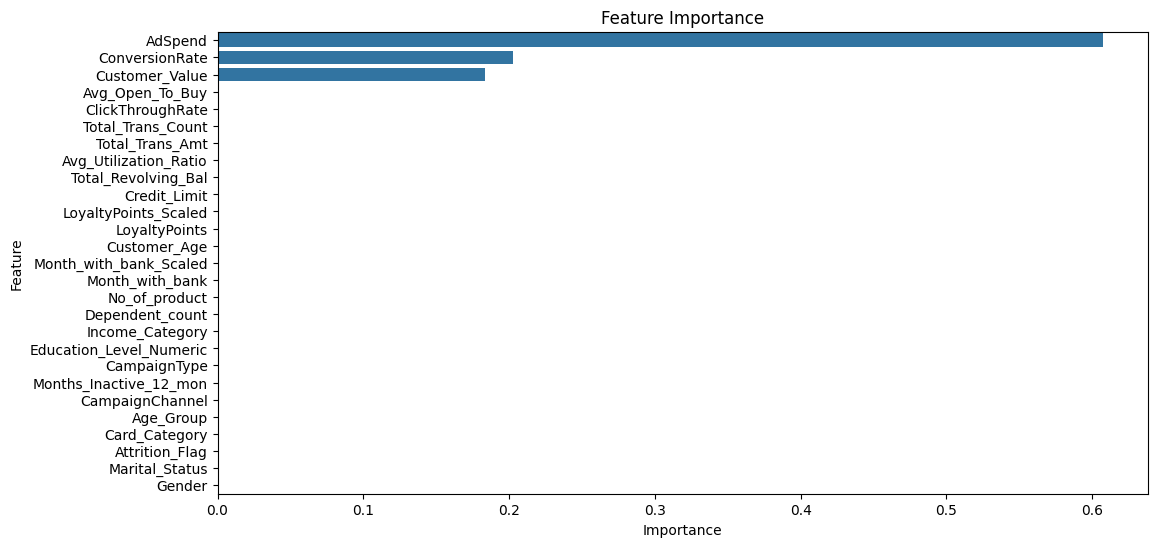

In [385]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

- from the chart, campaign type plays a greater role in feature importance.
- we shall develop a system to determine the best purpose of the campaign (eg. the types of strategy we want to use)

In [386]:
from sklearn.metrics import mean_squared_error, r2_score
import random
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [387]:
X.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Marital_Status', 'Income_Category', 'Card_Category', 'Month_with_bank',
       'No_of_product', 'Months_Inactive_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Trans_Amt',
       'Total_Trans_Count', 'Avg_Utilization_Ratio', 'Age_Group',
       'CampaignChannel', 'CampaignType', 'AdSpend', 'ConversionRate',
       'LoyaltyPoints', 'ClickThroughRate', 'LoyaltyPoints_Scaled',
       'Month_with_bank_Scaled', 'Customer_Value', 'Education_Level_Numeric'],
      dtype='object')

In [388]:
random.seed(42)
# Initialize a dictionary to hold models for each CampaignChannel
models = {}

# Split the data by CampaignChannel and train a model for each
for typee in df['CampaignType'].unique():
    type_data = df[df['CampaignType'] == typee]


    # Define features and target
    X = type_data.drop(columns=['ROI'])
    y = type_data['ROI']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train the Random Forest Regressor
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Store the model in the dictionary
    models[typee] = model

    # Evaluate the model
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f'Campaign Type: {typee}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared: {r2}\n')


Campaign Type: 0
Mean Squared Error: 119.2969781586123
R-squared: 0.9753503869036286

Campaign Type: 3
Mean Squared Error: 92.138286537488
R-squared: 0.9876063141363435

Campaign Type: 2
Mean Squared Error: 90.5563208965269
R-squared: 0.9884861506402888

Campaign Type: 1
Mean Squared Error: 89.35091917793841
R-squared: 0.982495588238829



In [389]:
# Now you can use the models to predict ROI for new customer data
def predict_roi_for_customer(customer_data):
    predictions = {}
    for typee, model in models.items():
        # Prepare the customer data (ensure it's in the same format as your training data)
        customer_df = pd.DataFrame([customer_data])

        # Ensure the customer_df has the same columns as the model's training data
        # Add missing columns if necessary (fill with zeros)
        for col in X.columns:
            if col not in customer_df.columns:
                customer_df[col] = 0
        customer_df = customer_df[X.columns]  # Reorder to match training data

        # Make prediction
        roi_prediction = model.predict(customer_df)[0]
        predictions[typee] = roi_prediction

    return predictions

# Example customer data (ensure this matches your feature format)
new_customer_data = {
    'Attrition_Flag': 1,
    'Customer_Age': 20,
    'Gender': 1,
    'Dependent_count': 3,
    'Marital_Status': 1,
    'Income_Category': 1,
    'Card_Category': 1,
    'Month_with_bank': 36,
    'No_of_product': 5,
    'Months_Inactive_12_mon': 2,
    'Credit_Limit': 3444,
    'Total_Revolving_Bal': 18000,
    'Avg_Open_To_Buy': 13498,
    'Total_Trans_Amt': 3375,
    'Total_Trans_Count': 78,
    'Avg_Utilization_Ratio': 0.34,
    'Age_Group': 0,
    'CampaignChannel': 0,
    'CampaignType': 1,
    'ConversionRate': 0.25,
    'LoyaltyPoints': 4000,
    'ClickThroughRate': 0.0344,
    'LoyaltyPoints_Scaled': 56899,
    'Month_with_bank_Scaled': 12377,
    'Customer_Value': 34488,
    'Education_Level_Numeric': 3
}

# Predict ROI for the example customer
roi_predictions = predict_roi_for_customer(new_customer_data)
print(roi_predictions) #hypothetical data, might not be very realistic

{0: 1028.722719756778, 3: 1420.7160818880072, 2: 1233.9961915053036, 1: 997.1937410069468}


Therefore, Type 3: Retention is preferred. Although the customer is not churning, the system predicted that something is wrong if no campaign action is taken on our side.

####Improving the accuracy of the model

In [390]:
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2, 20),
}


rf = RandomForestRegressor()
random_search = RandomizedSearchCV(models[0], param_distributions=param_dist, n_iter=100, cv=3, verbose=1, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
